In [234]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
le = LabelEncoder()

In [235]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submission_df = pd.read_csv("sample_submission.csv")
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [236]:
print(test_df.shape)
test_df.head()

(4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [237]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [238]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [239]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [240]:
train_df.drop(['Destination', 'HomePlanet', 'PassengerId','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'], axis=1, inplace=True)
# train_df.drop(['Destination', 'PassengerId','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'], axis=1, inplace=True)
# train_df.drop(["PassengerId", "Name", "Cabin"], inplace=True)

In [241]:
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
train_df['VIP'].fillna(train_df['VIP'].median(), inplace = True)
train_df['CryoSleep'].fillna(train_df['CryoSleep'].median(), inplace = True)

In [242]:
train_df.isnull().sum()

CryoSleep        0
Cabin          199
Age              0
VIP              0
Transported      0
dtype: int64

In [243]:
train_df['Cabin'] = le.fit_transform(train_df['Cabin'])

col_names = ['CryoSleep', 'VIP', 'Transported']
for col in col_names:
    for i, ele in enumerate(train_df[col]):
        if ele == True:
            train_df.at[i, col] = 1
        else:
            train_df.at[i, col] = 0
train_df

C:\Users\abhij\AppData\Local\Temp\ipykernel_23208\1727377812.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  train_df.at[i, col] = 0


,CryoSleep,Cabin,Age,VIP,Transported
0,0,149,39.0,0,0
1,0,2184,24.0,0,1
2,0,1,58.0,1,0
3,0,1,33.0,0,0
4,0,2186,16.0,0,1
...,...,...,...,...,...
8688,0,146,41.0,1,0
8689,1,5280,18.0,0,0
8690,0,5285,26.0,0,1
8691,0,2131,32.0,0,0


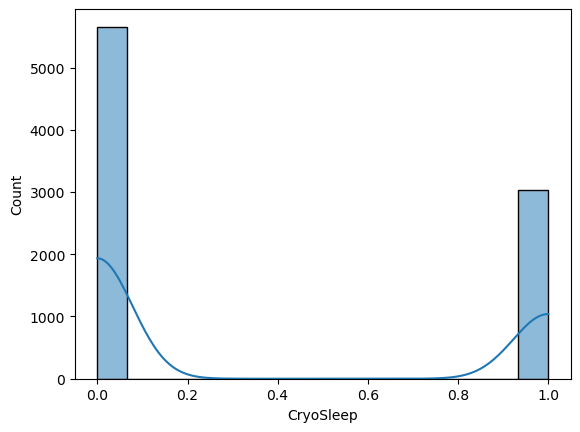

In [244]:
sns.histplot(train_df['CryoSleep'],kde=True)
plt.show()

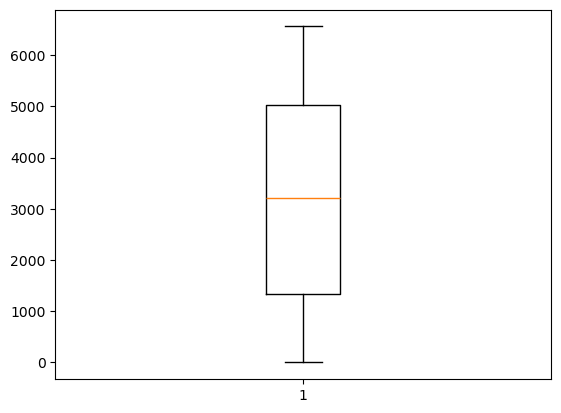

In [245]:
plt.boxplot(train_df['Cabin'])
plt.show()

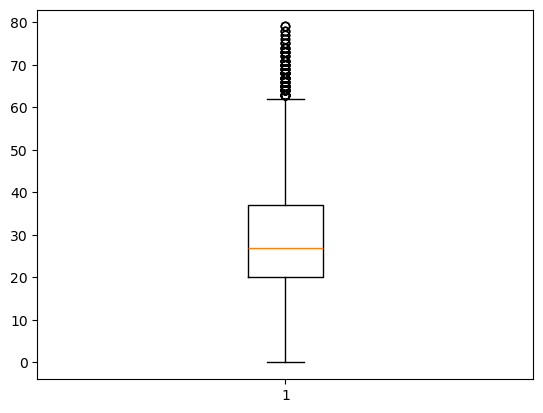

In [246]:
plt.boxplot(train_df['Age'])
plt.show()

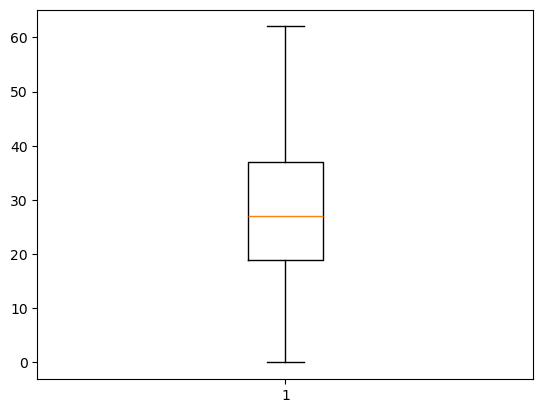

In [247]:
q1=train_df['Age'].quantile(0.25)
q3=train_df['Age'].quantile(0.75)

iqr=q3-q1

uw=q3+1.5*iqr
lw=q1-1.5*iqr

plt.boxplot(train_df["Age"][(train_df["Age"]>lw)&(train_df["Age"]<uw)])
plt.show()

In [248]:
#Normalize the values
min_val = train_df['Cabin'].min()
max_val = train_df['Cabin'].max()
train_df['Cabin'] = (train_df['Cabin'] - min_val) / (max_val - min_val)

min_val = train_df['Age'].min()
max_val = train_df['Age'].max()
train_df['Age'] = (train_df['Age'] - min_val) / (max_val - min_val)
train_df

,CryoSleep,Cabin,Age,VIP,Transported
0,0,0.022713,0.493671,0,0
1,0,0.332927,0.303797,0,1
2,0,0.000152,0.734177,1,0
3,0,0.000152,0.417722,0,0
4,0,0.333232,0.202532,0,1
...,...,...,...,...,...
8688,0,0.022256,0.518987,1,0
8689,1,0.804878,0.227848,0,0
8690,0,0.805640,0.329114,0,1
8691,0,0.324848,0.405063,0,0


In [249]:
print(len(train_df[train_df['Transported']==0]))
print(len(train_df[train_df['Transported']==1]))

4315
4378


In [250]:
X=train_df[train_df.columns[:-1]].values 
Y=train_df[train_df.columns[-1]].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=4,stratify=Y,test_size=0.1)

In [251]:
Y_train=Y_train.astype('int')
X_train=X_train.astype('int')
Y_test=Y_test.astype('int')
X_test=X_test.astype('int')

In [252]:
from sklearn.metrics import classification_report

In [253]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [254]:
Y_pred=knn_model.predict(X_test)

In [255]:
Y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,

In [256]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       432
           1       0.83      0.62      0.71       438

    accuracy                           0.74       870
   macro avg       0.76      0.74      0.74       870
weighted avg       0.76      0.74      0.74       870



In [257]:
confusion_matrix(Y_test,Y_pred)

array([[376,  56],
       [167, 271]], dtype=int64)

In [258]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()
nb_model=nb_model.fit(X_train,Y_train)

In [259]:
Y_pred=nb_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.04      0.07       432
           1       0.51      0.98      0.67       438

    accuracy                           0.51       870
   macro avg       0.59      0.51      0.37       870
weighted avg       0.59      0.51      0.37       870



In [260]:
confusion_matrix(Y_test,Y_pred)

array([[ 17, 415],
       [  8, 430]], dtype=int64)

In [261]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression(max_iter=30)
lr_model=lr_model.fit(X_train,Y_train)

In [262]:
Y_pred=lr_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       432
           1       0.83      0.62      0.71       438

    accuracy                           0.74       870
   macro avg       0.76      0.74      0.74       870
weighted avg       0.76      0.74      0.74       870



In [263]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [264]:
dtc=dtc.fit(X_train,Y_train)

Y_pred=dtc.predict(X_test)

In [265]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       432
           1       0.83      0.62      0.71       438

    accuracy                           0.74       870
   macro avg       0.76      0.74      0.74       870
weighted avg       0.76      0.74      0.74       870



In [266]:
confusion_matrix(Y_test,Y_pred)

array([[376,  56],
       [167, 271]], dtype=int64)

In [267]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(criterion='entropy')
rfc=rfc.fit(X_train,Y_train)

In [268]:
Y_pred=rfc.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       432
           1       0.83      0.62      0.71       438

    accuracy                           0.74       870
   macro avg       0.76      0.74      0.74       870
weighted avg       0.76      0.74      0.74       870



In [269]:
confusion_matrix(Y_test,Y_pred)

array([[376,  56],
       [167, 271]], dtype=int64)

In [270]:
from sklearn.svm import SVC

svm_model=SVC()
svm_model=svm_model.fit(X_train,Y_train)

In [271]:
Y_pred=svm_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       432
           1       0.83      0.62      0.71       438

    accuracy                           0.74       870
   macro avg       0.76      0.74      0.74       870
weighted avg       0.76      0.74      0.74       870



In [272]:
confusion_matrix(Y_test,Y_pred)

array([[376,  56],
       [167, 271]], dtype=int64)

In [273]:
import xgboost as xgb
from xgboost import DMatrix

clf_xgb=xgb.XGBClassifier(objective='binary:logistic', missing=0, verbosity=2, random_state=24, early_stopping_rounds=10, eval_metric='aucpr')

clf_xgb.fit(X_train,Y_train,eval_set=[(X_test,Y_test)])

[0]	validation_0-aucpr:0.74746
[1]	validation_0-aucpr:0.75226
[2]	validation_0-aucpr:0.75226
[3]	validation_0-aucpr:0.75327
[4]	validation_0-aucpr:0.75346
[5]	validation_0-aucpr:0.75346
[6]	validation_0-aucpr:0.75346
[7]	validation_0-aucpr:0.75346
[8]	validation_0-aucpr:0.75346
[9]	validation_0-aucpr:0.75346
[10]	validation_0-aucpr:0.75346
[11]	validation_0-aucpr:0.75346
[12]	validation_0-aucpr:0.75346
[13]	validation_0-aucpr:0.75346
[14]	validation_0-aucpr:0.75346


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=0, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=24, ...)

In [274]:
Y_pred=clf_xgb.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       432
           1       0.83      0.62      0.71       438

    accuracy                           0.74       870
   macro avg       0.76      0.74      0.74       870
weighted avg       0.76      0.74      0.74       870



In [275]:
confusion_matrix(Y_test,Y_pred)

array([[376,  56],
       [167, 271]], dtype=int64)

KNN - 74% <br>
Naive Bayes' Theorem - 51%<br>
Logistic Regression - 74%<br>
Decision Tree Classifier - 74%<br>
Random Forest Classifier - 74%<br>
Support Vector Machines (SVM) - 74%<br>
XGBoost Classifier - 74%<br>
